##first import all libraries


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, classification_report
import time
import pickle
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/Chando0185/cyberbullying_detection/refs/heads/main/dataset.csv")
print("First 5 records:", df.head())

First 5 records:                                             headline  label
0       cock  suck before you piss around on my work     -1
1  you are  gay or antisemmitian archangel white ...     -1
2            fuck your filthy mother in the ass  dry     -1
3  get fuck  ed up  get fuck  ed up got a drink t...     -1
4  stupid peace of  shit  stop deleting my stuff ...     -1


In [76]:
df['label'].unique()

array([-1,  0])

##data manipulation work here ---

In [77]:
def manipulation():
  df = pd.read_csv("https://raw.githubusercontent.com/Chando0185/cyberbullying_detection/refs/heads/main/dataset.csv")
  for i in df.index:
    if df.loc[i, 'label'] == -1:
      df.loc[i, 'label'] = 1
  return df

In [78]:
df = manipulation()
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


## Data Cleaning
Here, I will clean the text data by removing special characters, converting to lowercase, and removing stopwords.

In [79]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['cleaned_headline'] = df['headline'].apply(clean_text)
display(df[['headline', 'cleaned_headline']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,headline,cleaned_headline
0,cock suck before you piss around on my work,cock suck piss around work
1,you are gay or antisemmitian archangel white ...,gay antisemmitian archangel white tiger meow g...
2,fuck your filthy mother in the ass dry,fuck filthy mother ass dry
3,get fuck ed up get fuck ed up got a drink t...,get fuck ed get fuck ed got drink cant put get...
4,stupid peace of shit stop deleting my stuff ...,stupid peace shit stop deleting stuff ass hole...


In [80]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()
tokenized_text = df['cleaned_headline'].apply(lambda x: x.split())
tokenized_text = tokenized_text.apply(lambda x: [lemma.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [82]:
display(df['headline'].head())

,headline
0,cock suck before you piss around on my work
1,you are gay or antisemmitian archangel white ...
2,fuck your filthy mother in the ass dry
3,get fuck ed up get fuck ed up got a drink t...
4,stupid peace of shit stop deleting my stuff ...


In [83]:
df['label'].unique()

array([1, 0])

In [84]:
def perform_data_dis(df):
  total = df.shape[0]
  no_nontoxic = df[df['label'] == 0].shape[0]
  no_toxic = df[df['label'] == 1].shape[0]

  slices = [no_nontoxic/total, (total - no_nontoxic)/total]
  activities = ['Non-toxic', 'Toxic']
  cols = ['#008fd5', '#fc4f30']
  explode = [0.2, 0]
  plt.pie(slices, labels = activities, explode = explode, colors = cols, autopct = '%.1f%%')
  plt.title('Data Distribution')
  plt.tight_layout()
  plt.show()

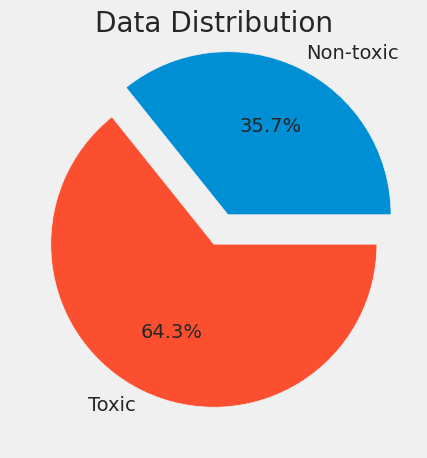

In [85]:
perform_data_dis(df)

In [86]:
def remove_pttrn(input_text, pattern):
  if(type(input_text) == str):
    r = re.findall(pattern, input_text)
    for i in r:
      input_text = re.sub(i, '', input_text)
    return input_text
  else:
    return ""

In [87]:
df['cleaned_headline'] = df['cleaned_headline'].apply(clean_text)
df

,headline,label,cleaned_headline
0,cock suck before you piss around on my work,1,cock suck piss around work
1,you are gay or antisemmitian archangel white ...,1,gay antisemmitian archangel white tiger meow g...
2,fuck your filthy mother in the ass dry,1,fuck filthy mother ass dry
3,get fuck ed up get fuck ed up got a drink t...,1,get fuck ed get fuck ed got drink cant put get...
4,stupid peace of shit stop deleting my stuff ...,1,stupid peace shit stop deleting stuff ass hole...
...,...,...,...
18143,deepak chahal se baga chutiya maine nahi dekha...,1,deepak chahal se baga chutiya maine nahi dekha...
18144,carry ki maa ki chut,1,carry ki maa ki chut
18145,ram kapoor ko priya se pyaar hai kya ?,0,ram kapoor ko priya se pyaar hai kya
18146,kya ram kapoor ki behen ke chut mai mera lund ...,1,kya ram kapoor ki behen ke chut mai mera lund ...


In [88]:
from sklearn.model_selection import train_test_split

X = df['cleaned_headline']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of dataframe:", df.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

tfidfvector = TfidfVectorizer(use_idf=True)
X_train_vectors = tfidfvector.fit_transform(X_train)
X_test_vectors = tfidfvector.transform(X_test)

pickle.dump(tfidfvector, open('tfidfmodel.pkl', 'wb'))

Shape of dataframe: (18148, 3)
Shape of X_train: (14518,)
Shape of X_test: (3630,)
Shape of y_train: (14518,)
Shape of y_test: (3630,)


##let's apply ML algorithm

In [89]:
def pipeline(X_train, y_train, X_test, y_test):
  models = [LinearSVC(), MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier()]
  size = len(y_train)
  final_results = []
  for model in models:
    start_train =  time.time()
    print(f"Training duration : {model}")
    model.fit(X_train, y_train)
    end_train = time.time()
    train_duration = end_train - start_train

    filename = model.__class__.__name__+".pkl"
    pickle.dump(model, open(filename, 'wb'))
    print(f"Training duration : {train_duration}")

    start_test = time.time()
    y_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    end_test = time.time()
    test_duration = end_test - start_test
    print(f"Testing duration : {test_duration}")

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, train_pred)
    precision_test = precision_score(y_test, y_pred)
    precision_train = precision_score(y_train, train_pred)
    f1_test = f1_score(y_test, y_pred)
    f1_train = f1_score(y_train, train_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_pred)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    classification_report_test = classification_report(y_test, y_pred)
    classification_report_train = classification_report(y_train, train_pred)


    print(f"Accuracy : {accuracy_test}")
    print(f"Accuracy : {accuracy_train}")

    print(f"Precision : {precision_test}")
    print(f"Precision : {precision_train}")

    print(f"F1 Score : {f1_test}")
    print(f"F1 Score : {f1_train}")

    print(f"Confusion Matrix : \n{confusion_matrix_test}")
    print(f"Confusion Matrix : \n{confusion_matrix_train}")

    print(f"Classification Report : \n{classification_report_test}")
    print(f"Classification Report : \n{classification_report_train}")

    print("-"*100)
    results = {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'F1 Score': f1_test,
        'Confusion Matrix': confusion_matrix_test.tolist(),
        'Classification Report': classification_report_test,
        'Training Duration': train_duration,
        'Testing Duration': test_duration
    }
    final_results.append(results.copy())
  return final_results

In [90]:
final_results = pipeline(X_train_vectors, y_train, X_test_vectors, y_test)

Training duration : LinearSVC()
Training duration : 0.05600547790527344
Testing duration : 0.0015172958374023438
Accuracy : 0.9275482093663912
Accuracy : 0.9949717591954814
Precision : 0.9452474813841437
Precision : 0.9939400382734425
F1 Score : 0.9425638785761083
F1 Score : 0.9961110223216664
Confusion Matrix : 
[[1209  125]
 [ 138 2158]]
Confusion Matrix : 
[[5096   57]
 [  16 9349]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1334
           1       0.95      0.94      0.94      2296

    accuracy                           0.93      3630
   macro avg       0.92      0.92      0.92      3630
weighted avg       0.93      0.93      0.93      3630

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5153
           1       0.99      1.00      1.00      9365

    accuracy                           0.99     14518
   macro avg    

In [91]:
def doingfinalresult(final_results):
   results = pd.DataFrame(final_results)
   results.index = ['LinearSVC', 'MultinomialNB', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                    'RandomForestClassifier', 'AdaBoostClassifier', 'BaggingClassifier']
   results.sort_values(by='F1 Score', ascending=False, inplace=True)
   return results

In [92]:
 results = doingfinalresult(final_results)

In [93]:
results.head()

,Model,Accuracy,Precision,F1 Score,Confusion Matrix,Classification Report,Training Duration,Testing Duration
BaggingClassifier,BaggingClassifier,0.937190,0.948395,0.950456,"[[1215, 119], [109, 2187]]",precision recall f1-score ...,39.580236,0.268273
DecisionTreeClassifier,DecisionTreeClassifier,0.928926,0.936590,0.944276,"[[1186, 148], [110, 2186]]",precision recall f1-score ...,7.336954,0.018013
LinearSVC,LinearSVC,0.927548,0.945247,0.942564,"[[1209, 125], [138, 2158]]",precision recall f1-score ...,0.056005,0.001517
LogisticRegression,LogisticRegression,0.924242,0.941074,0.940048,"[[1199, 135], [140, 2156]]",precision recall f1-score ...,0.790588,0.002128
RandomForestClassifier,RandomForestClassifier,0.920386,0.950606,0.936104,"[[1224, 110], [179, 2117]]",precision recall f1-score ...,35.962700,1.182036


In [94]:
results.describe()

,Accuracy,Precision,F1 Score,Training Duration,Testing Duration
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.849036,0.936869,0.844953,10.884588,0.926808
std,0.153595,0.043320,0.215331,16.808753,1.872098
min,0.484573,0.834467,0.321364,0.002413,0.001517
25%,0.844904,0.939953,0.877986,0.043664,0.004378
50%,0.922314,0.946821,0.938076,2.065878,0.143143
75%,0.927893,0.953193,0.942992,14.493391,0.661376
max,0.937190,0.977621,0.950456,39.580236,5.449545


##summmary through graph

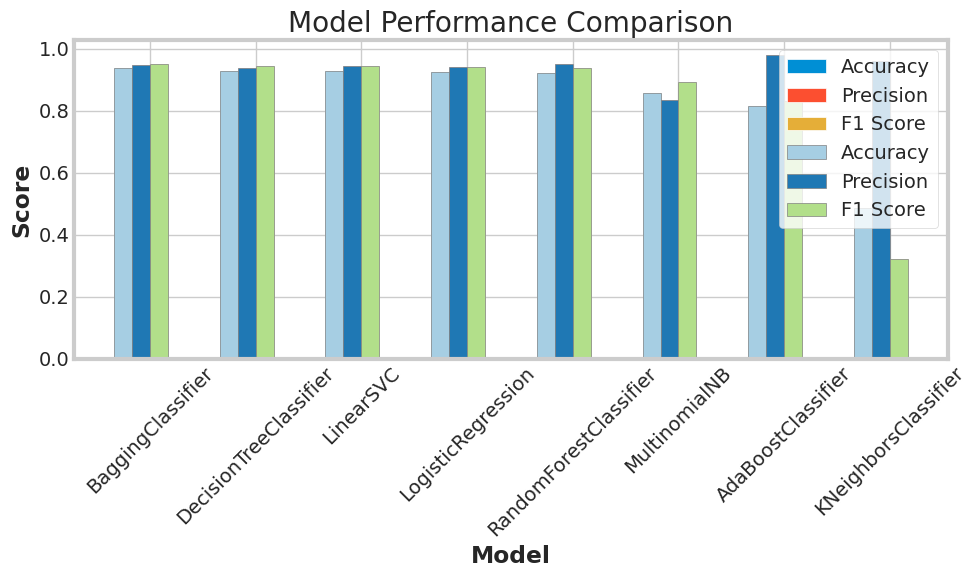

In [95]:
best_accuracy = results.loc[results['Accuracy'].idxmax()]
best_precision = results.loc[results['Precision'].idxmax()]
best_f1_score = results.loc[results['F1 Score'].idxmax()]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.17
index = np.arange(len(results))

plt.bar(index, results['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, results['Precision'], bar_width, label='Precision')
plt.bar(index + 2 * bar_width, results['F1 Score'], bar_width, label='F1 Score')

r1 = np.arange(len(results))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]

#make the plot
pal = sns.color_palette("Paired", 10)
plt.bar(r1, results['Accuracy'], color=pal[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, results['Precision'], color=pal[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, results['F1 Score'], color=pal[2], width=bar_width, edgecolor='grey', label='F1 Score')

# Add xricks on middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(results))], results.index, rotation=45)

# Creating Legend and Show graphs
plt.legend()
textstr = '\n'.join([
    'Best Accuracy: %f' % best_accuracy['Accuracy'],
    'Best Precision: %f' % best_precision['Precision'],
    'Best F1 Score: %f' % best_f1_score['F1 Score']])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

## Now checking which model taking more time and which taking less

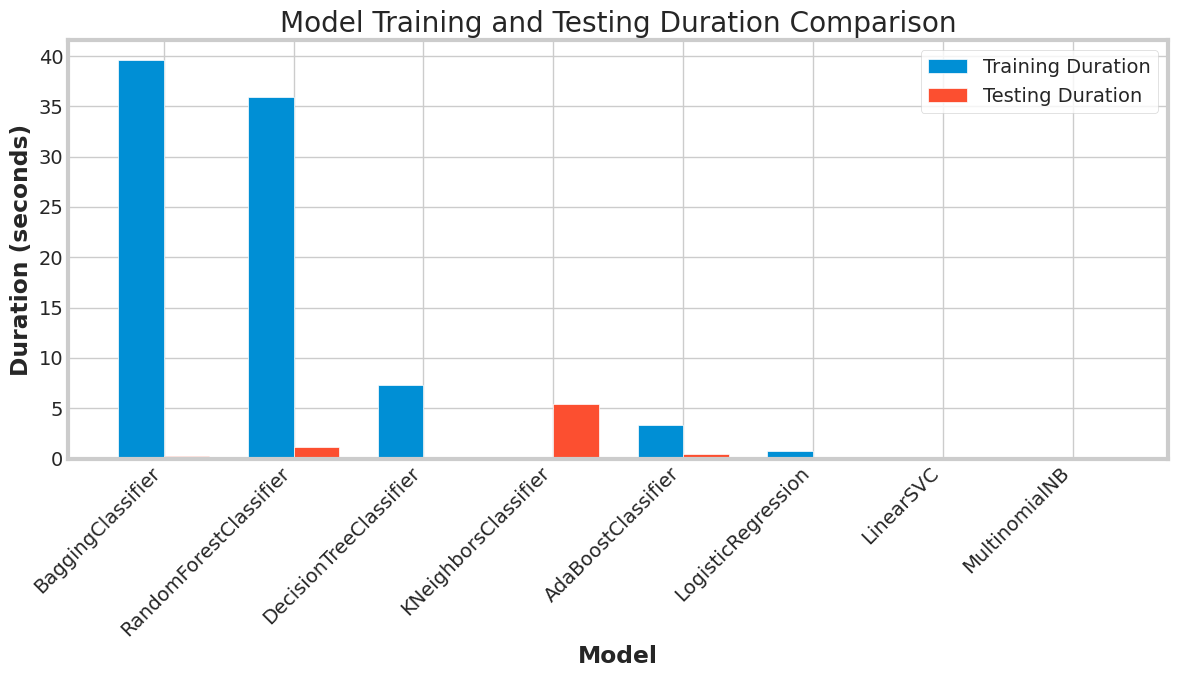

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'results' DataFrame is available from previous steps
# If not, re-run the cell that calls doingfinalresult(final_results)

results['Total Duration'] = results['Training Duration'] + results['Testing Duration']
results_sorted_duration = results.sort_values(by='Total Duration', ascending=False)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

bar_width = 0.35
index = np.arange(len(results_sorted_duration))

plt.bar(index, results_sorted_duration['Training Duration'], bar_width, label='Training Duration')
plt.bar(index + bar_width, results_sorted_duration['Testing Duration'], bar_width, label='Testing Duration')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Duration (seconds)', fontweight='bold')
plt.title('Model Training and Testing Duration Comparison')
plt.xticks(index + bar_width / 2, results_sorted_duration.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
data = ["you are fucking bastered"]

# Load the trained TfidfVectorizer
loaded_tfidf_vectorizer = pickle.load(open("tfidfmodel.pkl", "rb"))

# Preprocess the new data using the loaded vectorizer
preprocessed_data = loaded_tfidf_vectorizer.transform(data)

# Load the trained model
trained_model = pickle.load(open('LinearSVC.pkl', 'rb'))

# Predict using the trained model
prediction = trained_model.predict(preprocessed_data)
print(prediction)

if(prediction == 1):
    print("bulling")
else:
    print("non-bulling")

[1]
bulling


##Fine tune the model

In [98]:
from sklearn.model_selection import GridSearchCV

def tuining(clf, param_dict, X_train, y_train, X_test, y_test):
    scorer = make_scorer(f1_score)

    grid_obj = GridSearchCV(estimator=clf, param_grid=param_dict, scoring=scorer, cv=5)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_clf = grid_fit.best_estimator_

    prediction = (clf.fit(X_train, y_train)).predict(X_test)

    best_prediction = best_clf.predict(X_test)

    print(clf.__class__.__name__)
    print(f"Best Parameter:  {grid_fit.best_params_}")

    print(f"Accuracy:  {accuracy_score(y_test, best_prediction)}")

    print(f"F1 Score :  {f1_score(y_test, best_prediction)}")

    print(f"Precision :  {precision_score(y_test, best_prediction)}")

    print(f"Recall:  {recall_score(y_test, best_prediction)}")

In [99]:
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_model = LinearSVC()

tuining(clf_model, param_grid, X_train_vectors, y_train, X_test_vectors, y_test)

LinearSVC
Best Parameter:  {'C': 0.25}
Accuracy:  0.9264462809917355
F1 Score :  0.9415371140792643
Precision :  0.9467195068251871
Recall:  0.936411149825784


In [100]:
pickle.dump(clf_model, open("LinearSVCTuned.pkl", "wb"))